In [16]:
# We mount google drive to save the model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# We create a backup folder to save the weights
!mkdir -p /content/drive/MyDrive/OpenCVProject/backup

In [ ]:
# We download the code + dataset
# This ZIP file contains the trained YoloV3 model, whose mAP is of 72,30%
# and it has been trained with 6000 epochs for 2 classes, and a learning rate
# of 0.0001. The backbone used is the darknet53.conv.74
# The model has been trained in a local machine, due to Google Colab
# training time limitations. The output model is in the folder
# model/yolov3-train_best.weights
!wget https://www.dropbox.com/s/buazmc1lo4l7ld8/OpenCV_YoloV3.zip?dl=0 -O /content/project.zip
!unzip /content/project.zip -d /content/
!unzip /content/mask_nomask_dataset.zip -d /content/dataset
!rm -rf /content/project.zip
!rm -rf /content/mask_nomask_dataset.zip

In [ ]:
# We clone and compile the DarkNet framework.
!git clone https://github.com/AlexeyAB/darknet.git /content/darknet
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make -j12

In [ ]:
# We train the model
%cd /content/darknet
!./darknet detector train ../model/yolov3-setup.data ../model/yolov3-train.cfg ../model/darknet53.conv.74 -dont_show -map 2> ../train_log.txt

^C


In [3]:
# Function to show input vs predicted image:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg", 1)

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

In [ ]:
# We run the OD on the test images provided.
%cd /content/darknet
!mkdir -p /content/results/
!./darknet detector test ../model/yolov3-setup.data ../model/yolov3-test.cfg ../model/yolov3-train_best.weights ../test_images/test-image1.jpg -thresh .5

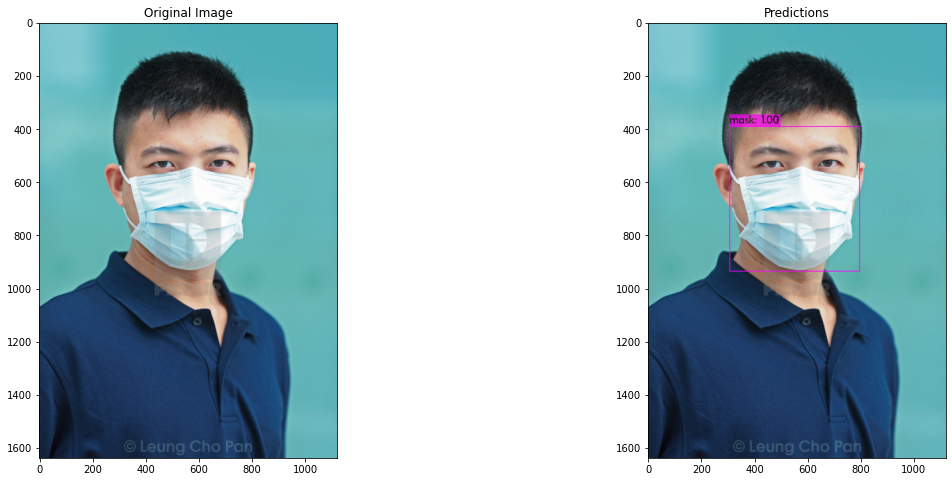

In [7]:
display_output("../test_images/test-image1.jpg")
!mv /content/darknet/predictions.jpg /content/results/test-image1.jpg

In [ ]:
!./darknet detector test ../model/yolov3-setup.data ../model/yolov3-test.cfg ../model/yolov3-train_best.weights ../test_images/test-image2.jpg -thresh .5

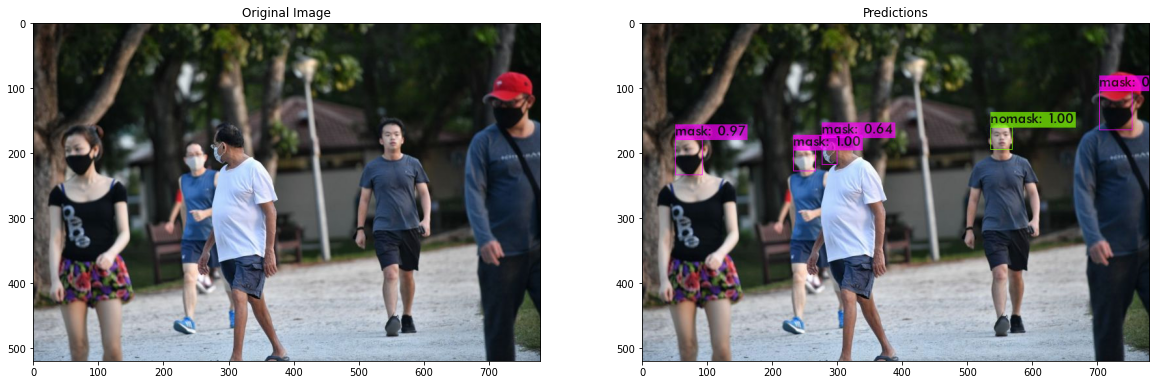

In [9]:
display_output("../test_images/test-image2.jpg")
!mv /content/darknet/predictions.jpg /content/results/test-image2.jpg

In [ ]:
!./darknet detector test ../model/yolov3-setup.data ../model/yolov3-test.cfg ../model/yolov3-train_best.weights ../test_images/test-image3.jpg -thresh .5

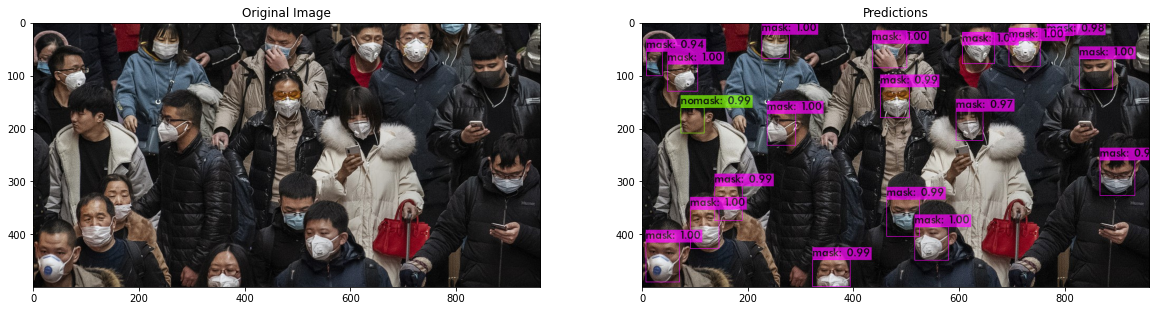

In [11]:
display_output("../test_images/test-image3.jpg")
!mv /content/darknet/predictions.jpg /content/results/test-image3.jpg

In [ ]:
!./darknet detector test ../model/yolov3-setup.data ../model/yolov3-test.cfg ../model/yolov3-train_best.weights ../test_images/test-image4.jpg -thresh .5

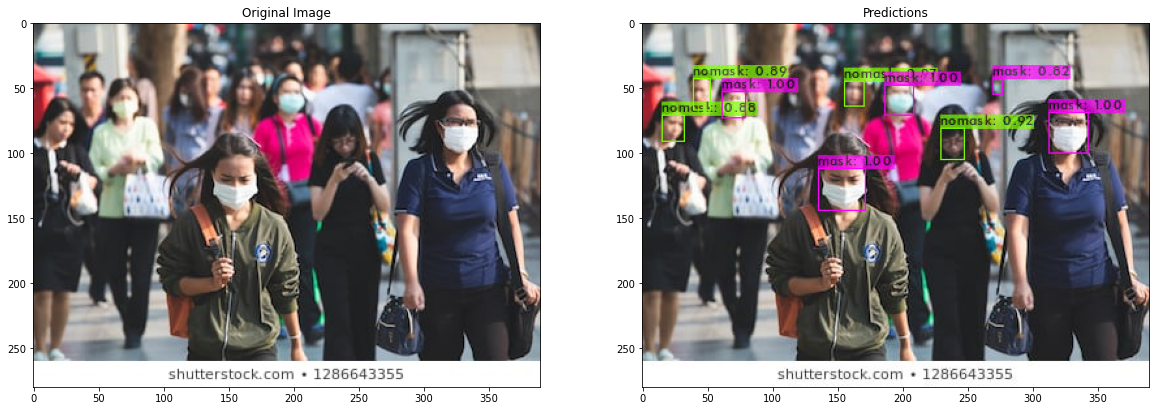

In [13]:
display_output("../test_images/test-image4.jpg")
!mv /content/darknet/predictions.jpg /content/results/test-image4.jpg

In [ ]:
# We run the OD on the two test videos.
!./darknet detector demo ../model/yolov3-setup.data ../model/yolov3-test.cfg ../model/yolov3-train_best.weights ../test_videos/test-video1.mp4 -thresh .5 -out_filename out-vid1.avi -dont_show

In [ ]:
!./darknet detector demo ../model/yolov3-setup.data ../model/yolov3-test.cfg ../model/yolov3-train_best.weights ../test_videos/test-video2.mp4 -thresh .5 -out_filename out-vid2.avi -dont_show